# Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

In [ ]:
Estimation: It is an observed numerical value used to estimate an unknown population parameter.

Point Estimate: Single numerical value used to estimate the unknown population parameter.

Interval Estimate: Range of values used to estimate the unknown population parameters.

# Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.

In [3]:
from scipy import stats
import numpy as np

def estimate_population_mean(sample_mean, sample_std, sample_size, confidence_level=0.95):
    """
    Estimate the population mean using the sample mean, standard deviation, and sample size.

    Parameters:
    sample_mean (float): Mean of the sample
    sample_std (float): Standard deviation of the sample
    sample_size (int): Number of observations in the sample
    confidence_level (float): Confidence level for the interval (default is 0.95)

    Returns:
    (float, float): Lower and upper bound of the confidence interval for the population mean
    """
    # Calculate the standard error of the mean (SEM)
    standard_error = sample_std / np.sqrt(sample_size)
    
    # Calculate the t-critical value for the given confidence level and degrees of freedom
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size-1)
    
    # Calculate the margin of error
    margin_of_error = t_critical * standard_error
    
    # Calculate the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return lower_bound, upper_bound

# Example usage
sample_mean = 50
sample_std = 10
sample_size = 30
confidence_level = 0.95

lower_bound, upper_bound = estimate_population_mean(sample_mean, sample_std, sample_size, confidence_level)
print(f"Estimated population mean is between {lower_bound:.2f} and {upper_bound:.2f} with {confidence_level*100}% confidence.")

Estimated population mean is between 46.27 and 53.73 with 95.0% confidence.


# Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

In [ ]:
What is Hypothesis testing?

Hypothesis testing is a statistical method used to make decisions or inferences about a population based on sample
data. It involves formulating a statement (hypothesis) about a population parameter and then using statistical
techniques to determine whether the data supports or refutes that hypothesis.

The process typically involves two competing hypotheses:

(i) Null Hypothesis (H₀): This is a statement of no effect, no difference, or no relationship. It assumes that any
observed differences in the data are due to random chance.
(ii) Alternative Hypothesis (H₁ or Ha): This is a statement that contradicts the null hypothesis. It proposes that
there is a real effect, difference, or relationship.

Why it is used?

Hypothesis testing is used for several reasons:
1. Decision Making: It helps in making decisions about the validity of a claim or assumption about a population.
For example, a company might want to know if a new product is more effective than an existing one, and hypothesis
testing can provide a statistical basis for that decision.

2. Inference: It allows researchers to make inferences about population parameters based on sample data, enabling
them to draw conclusions beyond the immediate data set.

3. Scientific Research: In scientific experiments, hypothesis testing is used to validate or refute theories and
models. It provides a formal framework for testing predictions and hypotheses.

4. Quality Control: In industries, hypothesis testing is often used for quality control, such as determining whether
a manufacturing process is producing items within acceptable limits.

State the importance of Hypothesis Testing?

1. Provides a Structured Approach: Hypothesis testing offers a systematic method for testing claims and making
decisions based on data. This reduces the influence of bias and subjective judgment.

2. Supports Decision-Making: By providing a clear framework for evaluating evidence, hypothesis testing helps
businesses, researchers, and policymakers make informed decisions.

3. Statistical Rigor: Hypothesis testing ensures that decisions are based on rigorous statistical analysis,
increasing the credibility and reliability of the results.

4. Risk Management: It quantifies the risk of making incorrect decisions (such as rejecting a true null hypothesis
or failing to reject a false one), allowing for better risk management.

# Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

In [ ]:
Null Hypothesis (H₀):
The null hypothesis is a statement that there is no difference or that the difference is in the opposite direction
than expected. In this case, it can be stated as:
H₀: μ₁ ≤ μ₂
Where,  μ1 is the average weight of male college students.
        μ2 is the average weight of female college students.

Alternative Hypothesis (H₁):
The alternative hypothesis is a statement that there is a difference or that the difference is in the direction we
expect. In this case, it can be stated as:
H₁: μ₁ > μ₂

Next Steps:
1. Collect Data: Obtain a random sample of weights from male and female college students.
2. Perform a Statistical Test: Use a t-test or another appropriate test to compare the means.
3. Analyze Results: If the test results provide enough evidence to reject the null hypothesis, you can conclude that
   the average weight of male college students is significantly greater than that of female college students.

# Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.

In [4]:
import numpy as np
from scipy import stats

def two_sample_t_test(sample1, sample2, alpha=0.05):
    """
    Perform a two-sample t-test to test the difference between two population means.

    Parameters:
    sample1 (array-like): Sample data from the first population
    sample2 (array-like): Sample data from the second population
    alpha (float): Significance level (default is 0.05)

    Returns:
    dict: A dictionary containing the test statistic, p-value, and conclusion
    """
    # Calculate the means and standard deviations of the samples
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)  # Sample standard deviation (ddof=1)
    std2 = np.std(sample2, ddof=1)

    # Perform a two-sample t-test
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)
    
    # Determine if we reject the null hypothesis
    conclusion = 'Reject the null hypothesis (H₀)' if p_value < alpha else 'Fail to reject the null hypothesis (H₀)'

    # Return results
    return {
        't_statistic': t_stat,
        'p_value': p_value,
        'mean1': mean1,
        'mean2': mean2,
        'std1': std1,
        'std2': std2,
        'conclusion': conclusion
    }

# Example usage:
# Sample data from two populations (e.g., weights of male and female college students)
sample1 = [70, 72, 68, 75, 73, 71, 69, 74, 70, 72]  # Sample from population 1 (e.g., male students)
sample2 = [65, 67, 66, 64, 63, 68, 69, 62, 64, 66]  # Sample from population 2 (e.g., female students)

# Perform the hypothesis test
results = two_sample_t_test(sample1, sample2)

# Display the results
print(f"t-statistic: {results['t_statistic']:.4f}")
print(f"p-value: {results['p_value']:.4f}")
print(f"Mean of sample 1: {results['mean1']:.2f}")
print(f"Mean of sample 2: {results['mean2']:.2f}")
print(f"Standard deviation of sample 1: {results['std1']:.2f}")
print(f"Standard deviation of sample 2: {results['std2']:.2f}")
print(f"Conclusion: {results['conclusion']}")

t-statistic: 6.0404
p-value: 0.0000
Mean of sample 1: 71.40
Mean of sample 2: 65.40
Standard deviation of sample 1: 2.22
Standard deviation of sample 2: 2.22
Conclusion: Reject the null hypothesis (H₀)


# Q6: What is a null and alternative hypothesis? Give some examples.

In [ ]:
What is a Null Hypothesis (H₀)?
Ans: The null hypothesis (H₀) is a statement or assumption that there is no effect, no difference, or no relationship
between variables. It is a default position that indicates that any observed differences or effects in the data
are due to random chance or sampling variability. The null hypothesis is typically the hypothesis that researchers
seek to test and possibly reject.

What is an Alternative Hypothesis (H₁ or Ha)?
The alternative hypothesis (H₁ or Ha) is a statement that contradicts the null hypothesis. It suggests that there is
a real effect, difference, or relationship between variables. If the null hypothesis is rejected based on the data,
the alternative hypothesis is accepted as a plausible explanation.

Examples of Null and Alternative Hypotheses:
Example 1: Testing the Effectiveness of a New Drug
Null Hypothesis (H₀): The new drug has no effect on blood pressure; it is no more effective than a placebo.
H0: μdrug=μplacebo
Alternative Hypothesis (H₁): The new drug lowers blood pressure more effectively than a placebo.
H1: μdrug<μplacebo

Example 2: Comparing the Means of Two Groups (e.g., Male and Female Students Test Scores)
Null Hypothesis (H₀): There is no difference in the average test scores between male and female students.
H0: μmale=μfemale
Alternative Hypothesis (H₁): There is a difference in the average test scores between male and female students.
H1: μmale!=μfemale

# Q7: Write down the steps involved in hypothesis testing.

In [ ]:
Steps Involved in Hypothesis Testing:

1. State the Hypotheses:

(i) Formulate two competing hypotheses: the null hypothesis (H₀) and the alternative hypothesis (H₁ or Ha).
(ii) Example: H₀: μ = μ₀ (no effect or no difference), H₁: μ ≠ μ₀ (there is an effect or difference).

2. Set the Significance Level (α):

Choose the significance level, typically α = 0.05 or 5%, which defines the probability of rejecting the null
hypothesis when it is actually true (Type I error).

3. Select the Appropriate Test Statistic:

(i) Depending on the data and research question, choose the appropriate statistical test (e.g., t-test, z-test,
chi-square test, etc.).
(ii) Calculate the test statistic based on the sample data.

4. Determine the Decision Rule:

(i) Identify the critical value(s) from the statistical distribution corresponding to the chosen significance level
(α).
(ii) Define the decision rule: Reject H₀ if the test statistic falls in the critical region, otherwise fail to
reject H₀.

5. Calculate the Test Statistic and P-value:

(i) Perform the calculations to obtain the test statistic from your sample data.
(ii) Compute the p-value, which represents the probability of observing the test statistic under the null hypothesis.

6. Make a Decision:

(i) Compare the p-value with the significance level (α).
(ii) If p-value ≤ α, reject the null hypothesis (H₀).
(iii) If p-value > α, fail to reject the null hypothesis (H₀).

7. Draw a Conclusion:

Interpret the results in the context of the research question. State whether there is enough evidence to support
the alternative hypothesis or if the null hypothesis cannot be rejected.

# Q8. Define p-value and explain its significance in hypothesis testing.

In [ ]:
Definition of p-value:

The p-value (probability value) is the probability of obtaining test results at least as extreme as the observed
results, assuming that the null hypothesis (H₀) is true. It quantifies the evidence against the null hypothesis.

Significance of p-value in Hypothesis Testing:

1. Decision-Making Tool:
The p-value helps in making a decision regarding the null hypothesis. It indicates how compatible the sample data
is with the null hypothesis.

2. Comparison with Significance Level (α):
(i) The p-value is compared to the pre-determined significance level (α), usually set at 0.05 (5%).
(ii) If p-value ≤ α: There is enough evidence to reject the null hypothesis (statistically significant result).
(iii)If p-value > α: There is not enough evidence to reject the null hypothesis (statistically insignificant result).

3. Measure of Evidence:
(i) A smaller p-value indicates stronger evidence against the null hypothesis, suggesting that the observed data is
less likely under the assumption that H₀ is true.
(ii) Conversely, a larger p-value suggests weaker evidence against the null hypothesis, meaning the data is more
consistent with H₀.

4. Limitations:
(i) The p-value alone does not measure the size of an effect or the importance of a result.
(ii) It also does not provide the probability that the null hypothesis is true or false.

# Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.

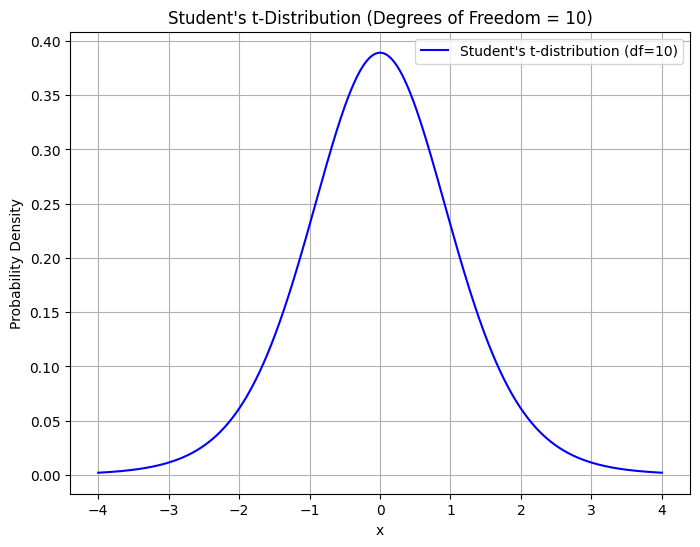

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Degrees of freedom
df = 10

# Generate x values (t-distribution's range)
x = np.linspace(-4, 4, 1000)

# Generate y values (t-distribution's probability density function)
y = t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f"Student's t-distribution (df={df})", color='blue')

# Add title and labels
plt.title("Student's t-Distribution (Degrees of Freedom = 10)")
plt.xlabel("x")
plt.ylabel("Probability Density")

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

# Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.

In [5]:
import numpy as np
from scipy import stats

# Generate two random samples of equal size
np.random.seed(0)  # For reproducibility
sample1 = np.random.normal(loc=5, scale=1, size=30)  # Sample 1: mean=5, std=1, size=30
sample2 = np.random.normal(loc=5.5, scale=1, size=30)  # Sample 2: mean=5.5, std=1, size=30

# Perform a two-sample t-test for independent samples
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Output the results
print(f"Two-Sample t-Test Results:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The population means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The population means are not significantly different.")

Two-Sample t-Test Results:
T-statistic: 0.8897
P-value: 0.3773
Fail to reject the null hypothesis: The population means are not significantly different.


# Q11: What is Student’s t distribution? When to use the t-Distribution.

In [ ]:
What is Student's t-Distribution?
Student's t-distribution (or simply t-distribution) is a probability distribution that is used to estimate
population parameters when the sample size is small, and the population standard deviation is unknown. It is similar
in shape to the standard normal distribution (bell-shaped and symmetric), but has heavier tails, which means it is
more prone to producing values that fall far from the mean.

The t-distribution is defined by a parameter called degrees of freedom (df), which is related to the sample size.
As the degrees of freedom increase (typically with larger sample sizes), the t-distribution approaches the standard
normal distribution (Z-distribution).


When to Use the t-Distribution?

1. Small Sample Sizes (n < 30):
The t-distribution is often used when the sample size is small (typically less than 30). When sample sizes are
larger, the t-distribution and the normal distribution become nearly identical.

2. Unknown Population Standard Deviation:
Use the t-distribution when the population standard deviation (σ) is unknown, and you have to estimate it using the 
sample standard deviation (s).

3. When Performing Hypothesis Tests or Confidence Intervals for Means:
The t-distribution is used when conducting t-tests for hypothesis testing (e.g., one-sample, two-sample, or paired
t-tests) and when constructing confidence intervals for the population mean.

# Q12: What is t-statistic? State the formula for t-statistic.

In [ ]:
What is a t-Statistic?
The t-statistic is a standardized value that measures how far a sample mean is from the hypothesized population
mean, relative to the variation in the sample data. It is used in hypothesis testing to determine whether to reject
the null hypothesis. The t-statistic accounts for sample size and variability, making it a crucial component in
tests involving small sample sizes.

# Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50. Estimate the population mean revenue with a 95% confidence interval.

In [ ]:
1. Given data, Sample mean=$500 
Sample standard deviation (s) = $50
Sample size (n) = 50
Confidence level = 95%

2. Determine the appropriate z-score for a 95% confidence level:
For a 95% confidence interval, the z-score corresponds to the critical value that leaves 2.5% in each tail of the
standard normal distribution.

The z-score for a 95% confidence level is approximately: z=1.96

3. Calculate the standard error of the mean (SEM):
SEM = 50/0.071 = 7.071

4. Calculate the margin of error (MOE):

Substituting the values: MOE=1.96×7.071≈13.87

5. Calculate the confidence interval:
Confidence interval=(500−13.87,500+13.87)
Confidence interval=(486.13,513.87)

Answer: The 95% confidence interval for the population mean revenue is approximately (486.13,513.87) dollars.

# Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

In [ ]:
Given data, Hypothesized mean decrease (𝜇0)= 10 mmHg
Sample mean decrease =8 mmHg
Sample standard deviation (s) = 3 mmHg
Sample size (n) = 100
Significance level (α) = 0.05

1. State the Hypotheses:

Null Hypothesis (H0): The drug decreases blood pressure by 10 mmHg, so μ=10.
Alternative Hypothesis (H1): The drug does not decrease blood pressure by 10 mmHg, so 𝜇 ≠ 10

2. Calculate the t-Statistic:

t = 8-10/0.3 = -6.67

3. Determine the Critical t-Value:

For a two-tailed test with 𝛼=0.05 and 𝑛−1=100−1=99 degrees of freedom, the critical t-value can be found using a
t-distribution table or statistical software. For df=99, the critical t-value for a 95% confidence level
(two-tailed) is approximately ±1.984.

4. Compare the t-Statistic to the Critical t-Value:

If ∣t∣ > critical t-value, reject the null hypothesis.
If ∣t∣ ≤ critical t-value, fail to reject the null hypothesis.
Here, ∣−6.67∣ > 1.984, so we reject the null hypothesis.

Conclusion:
The calculated t-statistic is approximately -6.67, which is greater in magnitude than the critical t-value of ±1.984.
Therefore, at a significance level of 0.05, we reject the null hypothesis. This indicates that there is sufficient
evidence to suggest that the drug does not decrease blood pressure by exactly 10 mmHg.

# Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

In [ ]:
Given Data:
Hypothesized mean weight (μ0) = 5 pounds
Sample mean weight () = 4.8 pounds
Population standard deviation (σ) = 0.5 pounds
Sample size (n) = 25
Significance level (α) = 0.01

1. State the Hypotheses:

Null Hypothesis (H0): The true mean weight is 5 pounds, so μ=5.
Alternative Hypothesis (H1): The true mean weight is less than 5 pounds, so μ<5.

2. Calculate the z-Statistic:
    z = 4.8-5/0.1 = -2.0

3. Determine the Critical z-Value:

For a one-tailed test with α=0.01, the critical z-value can be found using the z-distribution table. For a 1%
significance level (one-tailed), the critical z-value is approximately -2.33.

4. Compare the z-Statistic to the Critical z-Value:

If z< critical z-value, reject the null hypothesis.
If z≥ critical z-value, fail to reject the null hypothesis.

Here, z=−2.0, which is greater than -2.33, so we fail to reject the null hypothesis.

Conclusion:
The calculated z-statistic is -2.0, which is not less than the critical z-value of -2.33 for a significance level of
0.01. Therefore, at the 0.01 significance level, we fail to reject the null hypothesis. This indicates that there is
not enough evidence to conclude that the true mean weight of the products is less than 5 pounds.

# Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

In [ ]:
Given data,

Group 1:
Sample size (n1) = 30
Sample mean () = 80
Sample standard deviation (s1) = 10

Group 2:
Sample size (n2 ) = 40
Sample mean () = 75
Sample standard deviation (s2) = 8
Significance level (α) = 0.01

1. State the Hypotheses:

Null Hypothesis (H0): The population means are equal, so 𝜇1=𝜇2
Alternative Hypothesis (H1): The population means are not equal, so 𝜇1≠𝜇2

2. Calculate the Pooled Variance ():

sp2 = 2900+2496/68 = 5396/6 = 79.0

3. Calculate the Standard Error (SE) of the Difference Between Means:

SE = 2.14

4. Calculate the t-Statistic:

t=80-75/2.14 = 5/2.14 = 2.34

5. Determine the Critical t-Value:

For a two-tailed test with α=0.01 and 𝑛1+𝑛2−2=68 degrees of freedom, the critical t-value can be found using a
t-distribution table or statistical software. For 68 degrees of freedom and α/2=0.005 (two-tailed), the critical
t-value is approximately ±2.639.

6. Compare the t-Statistic to the Critical t-Value:

If ∣t∣ > critical t-value, reject the null hypothesis.
If ∣t∣ ≤ critical t-value, fail to reject the null hypothesis.
Here, ∣2.34∣ < 2.639, so we fail to reject the null hypothesis.

Conclusion:
The calculated t-statistic is approximately 2.34, which is less than the critical t-value of ±2.639 for a
significance level of 0.01. Therefore, at the 0.01 significance level, we fail to reject the null hypothesis.
This indicates that there is not enough evidence to conclude that the population means for the two groups are
different.

# Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [ ]:
1. Identify the given data:
Given, Sample size, n=50
Sample mean, = 4
Sample standard deviation, s=1.5
Confidence level = 99%

2. Determine the appropriate z-score for a 99% confidence level:
For a 99% confidence interval, the z-score corresponds to the critical value that leaves 0.5% in each tail of the
standard normal distribution.

The z-score for a 99% confidence level is approximately: z=2.576

3. Calculate the standard error of the mean (SEM):
SEM = 1.5 / 7.071 = 0.2121

4. Calculate the margin of error (MOE):
          The margin of error is calculated using the formula: MOE = MOE=z×SEM
                                                               MOE = 2.576×0.2121≈0.5466

5. Calculate the confidence interval:
Confidence interval=(4−0.5466,4+0.5466)

Confidence interval=(3.4534,4.5466)

Answer: The 99% confidence interval for the population mean is approximately (3.4534,4.5466).